<a href="https://colab.research.google.com/github/palienko105/Projects/blob/main/Special_promotion_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Данный блокнот является аналогией блокнота "Special_promotion_SQL.ipynb". Отличия лишь в том, что тут нет SQL.

# Задание

Работа с данными  

Предположим в июле провели специальную акцию, направленную на улучшение ретеншена. Новым юзерам слали письмо с купоном. Сработала ли акция?


https://drive.google.com/file/d/1bRsb_MPMbB9g4gqYzUvJbr4c0OqjPJtz/view?usp=sharing  

Обратно нужно дать файл с формулами или кодом и описание того, как получился результат поэтапно.

In [69]:
url = 'https://drive.google.com/file/d/1bRsb_MPMbB9g4gqYzUvJbr4c0OqjPJtz/view?usp=sharing'

In [70]:
!gdown --id 1bRsb_MPMbB9g4gqYzUvJbr4c0OqjPJtz

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bRsb_MPMbB9g4gqYzUvJbr4c0OqjPJtz
To: /content/analyst_test_transactions_db.csv
100% 3.07M/3.07M [00:00<00:00, 223MB/s]


In [3]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt

# Первоначальный анализ данных

In [71]:
df = pd.read_csv('/content/analyst_test_transactions_db.csv')

In [72]:
df

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-15,2015-03-28,1095
76853,31360,145146.0,2015-01-04,2015-08-09,547
76854,56195,8929.0,2012-09-18,2015-11-12,850
76855,46362,78673.0,2015-02-20,2015-07-21,356


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76857 entries, 0 to 76856
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           76857 non-null  int64  
 1   order_id          76857 non-null  float64
 2   reg_date          76857 non-null  object 
 3   transaction_date  76857 non-null  object 
 4   revenue           76857 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.9+ MB


In [74]:
df['reg_date'] = pd.to_datetime(df['reg_date'], format='%Y-%m-%d')
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%Y-%m-%d')

In [75]:
df.dtypes

user_id                      int64
order_id                   float64
reg_date            datetime64[ns]
transaction_date    datetime64[ns]
revenue                      int64
dtype: object

In [76]:
df.describe()

,user_id,order_id,revenue
count,76857.000000,76857.000000,76857.000000
mean,50112.561120,99950.627984,1000.587559
std,20051.576685,53283.741305,248.729287
min,-37599.000000,-138325.000000,-146.000000
25%,36575.000000,62909.000000,832.000000
50%,50145.000000,100145.000000,1001.000000
75%,63716.000000,136997.000000,1168.000000
max,138987.000000,305790.000000,2069.000000


In [77]:
df.sort_values('reg_date')

,user_id,order_id,reg_date,transaction_date,revenue
21963,88064,204663.0,1900-01-01,2015-02-10,900
8373,68835,150149.0,1900-01-01,2015-05-15,1491
41946,84641,79652.0,1900-01-01,2015-01-29,1204
23529,65753,85151.0,1900-01-01,2015-08-14,883
6758,34931,178940.0,1900-01-01,2015-01-30,1194
...,...,...,...,...,...
19743,61350,42970.0,2015-11-20,2015-11-20,928
57074,76114,58567.0,2015-11-20,2015-11-20,1178
45912,103522,117784.0,2015-11-20,2015-11-20,551
53408,72162,50111.0,2015-11-20,2015-11-20,805


In [78]:
df.sort_values('transaction_date')

,user_id,order_id,reg_date,transaction_date,revenue
70356,47642,90447.0,2014-09-25,2015-01-01,1049
63915,85641,119189.0,2015-01-01,2015-01-01,1142
39110,73194,13885.0,2012-09-08,2015-01-01,967
61344,79667,113104.0,2013-09-28,2015-01-01,1386
36208,13464,193540.0,2013-06-16,2015-01-01,1059
...,...,...,...,...,...
40969,28724,160516.0,2015-10-31,2015-11-20,226
59587,53032,85413.0,2014-07-05,2015-11-20,1387
46206,55355,145407.0,2015-08-03,2015-11-20,879
13429,14070,140347.0,2015-05-23,2015-11-20,804


Информация о транзакциях есть только за 2015 год. 

В данной задаче сказано, что специальную акцию провели в июле. Т.к. информация о транзакциях есть только за 2015 год, то и акцию провели в июле 2015 года. Буду данные за предыдущие месяцы (до июля 2015 года) с данными за последующие месяцы (после июля 2015 года). 

Имеет смысл перевести все даты к месячному формату (буду брать первое число кждого месяца от даты).

In [79]:
df['reg_date'] = df['reg_date'].astype('datetime64[M]')
df['transaction_date'] = df['transaction_date'].astype('datetime64[M]')

In [80]:
df.groupby('user_id').agg({'reg_date':'nunique'}).sort_values('reg_date')

,reg_date
user_id,
-37599,1
58679,1
58671,1
58669,1
58668,1
...,...
55155,7
45576,7
60237,7


Из таблицы выше видно, что у некоторых пользователей отрицательный user_id (скорее всего знак минус появился при формировании данных). У некоторых пользователей несколько дат регистраций. Т.к. нет пояснения из-за чего такое могло произойти, то было принято решение брать минимальную дату регистрации из всех представленных дат для каждого конкретного  пользователя.

В задании говориться, что суть акции заключается в том, что новым юзерам слали письмо с купоном. Не совсем понятно, кого в данном случае считать "новым юзером". Предположим, что это пользователи, которые зарегистрировались в июле 2015 или позже.

# Решение:

In [82]:
df

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-01,2015-07-01,1088
1,40047,81824.0,2013-11-01,2015-01-01,1027
2,48153,144851.0,2015-07-01,2015-10-01,601
3,54591,116111.0,2013-07-01,2015-04-01,881
4,39789,134943.0,2013-05-01,2015-07-01,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-01,2015-03-01,1095
76853,31360,145146.0,2015-01-01,2015-08-01,547
76854,56195,8929.0,2012-09-01,2015-11-01,850
76855,46362,78673.0,2015-02-01,2015-07-01,356


Найдем минимальную дату регистрации и отберем тех юзеров, у которых эта дата >='2015-01-01'

In [83]:
t = df.groupby('user_id').agg({'reg_date':'min'}).sort_values('reg_date')

In [84]:
t = t[t['reg_date'] >= '2015-01-01'].sort_values('reg_date').reset_index()

In [85]:
t

,user_id,reg_date
0,26595,2015-01-01
1,12938,2015-01-01
2,48017,2015-01-01
3,17304,2015-01-01
4,58684,2015-01-01
...,...,...
15925,47158,2015-11-01
15926,68187,2015-11-01
15927,4125,2015-11-01
15928,46768,2015-11-01


Найдем всех пользователей, которые зарегались в 2015 году.
Это итогавая таблица с данными за 2015 год, с которой буду в дальнейшем работать.

In [86]:
df = df.merge(t,how='inner', on='user_id')

In [87]:
df.columns

Index(['user_id', 'order_id', 'reg_date_x', 'transaction_date', 'revenue',
       'reg_date_y'],
      dtype='object')

In [90]:
itog = df[['user_id', 'order_id', 'transaction_date', 'revenue',
       'reg_date_y']].copy()

In [91]:
itog.rename(columns={'reg_date_y':'reg_date_new'}, inplace=True)

In [92]:
itog

,user_id,order_id,transaction_date,revenue,reg_date_new
0,48153,144851.0,2015-10-01,601,2015-07-01
1,72102,84827.0,2015-11-01,946,2015-08-01
2,68685,37792.0,2015-09-01,854,2015-01-01
3,68685,125090.0,2015-05-01,1008,2015-01-01
4,68685,141813.0,2015-09-01,1187,2015-01-01
...,...,...,...,...,...
19503,63401,118237.0,2015-09-01,1168,2015-01-01
19504,79426,89007.0,2015-04-01,1086,2015-01-01
19505,41215,132032.0,2015-08-01,224,2015-01-01
19506,82072,63328.0,2015-08-01,881,2015-08-01


Рассчитаем разницу между month_transaction_date и new_reg_month

In [116]:
itog['diff_date'] = round((itog['transaction_date'] - itog['reg_date_new'])/np.timedelta64(1,'M'))

In [119]:
itog

,user_id,order_id,transaction_date,revenue,reg_date_new,diff_date
0,48153,144851.0,2015-10-01,601,2015-07-01,3.0
1,72102,84827.0,2015-11-01,946,2015-08-01,3.0
2,68685,37792.0,2015-09-01,854,2015-01-01,8.0
3,68685,125090.0,2015-05-01,1008,2015-01-01,4.0
4,68685,141813.0,2015-09-01,1187,2015-01-01,8.0
...,...,...,...,...,...,...
19503,63401,118237.0,2015-09-01,1168,2015-01-01,8.0
19504,79426,89007.0,2015-04-01,1086,2015-01-01,3.0
19505,41215,132032.0,2015-08-01,224,2015-01-01,7.0
19506,82072,63328.0,2015-08-01,881,2015-08-01,0.0


In [123]:
svod = itog.pivot_table(index='reg_date_new', columns='diff_date', values='user_id', aggfunc='nunique')

In [124]:
svod

diff_date,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
reg_date_new,,,,,,,,,,,
2015-01-01,268.0,266.0,297.0,267.0,264.0,286.0,271.0,301.0,289.0,341.0,262.0
2015-02-01,260.0,277.0,266.0,238.0,239.0,234.0,242.0,292.0,319.0,206.0,NaN
2015-03-01,300.0,253.0,237.0,233.0,253.0,266.0,254.0,312.0,214.0,NaN,NaN
2015-04-01,316.0,258.0,236.0,222.0,263.0,224.0,274.0,208.0,NaN,NaN,NaN
2015-05-01,313.0,234.0,196.0,173.0,194.0,202.0,168.0,NaN,NaN,NaN,NaN
2015-06-01,415.0,348.0,290.0,271.0,305.0,228.0,NaN,NaN,NaN,NaN,NaN
2015-07-01,528.0,618.0,334.0,339.0,232.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,580.0,368.0,305.0,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,413.0,367.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
vsego_reg_users = itog.groupby('reg_date_new').agg({'user_id':'nunique'}).sort_index().T

In [127]:
vsego_reg_users

reg_date_new,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
user_id,2292,1957,1828,1632,1270,1609,1865,1370,962,831,314


In [128]:
vrem = svod.T

In [129]:
vrem

reg_date_new,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
diff_date,,,,,,,,,,,
0.0,268.0,260.0,300.0,316.0,313.0,415.0,528.0,580.0,413.0,467.0,314.0
1.0,266.0,277.0,253.0,258.0,234.0,348.0,618.0,368.0,367.0,373.0,NaN
2.0,297.0,266.0,237.0,236.0,196.0,290.0,334.0,305.0,213.0,NaN,NaN
3.0,267.0,238.0,233.0,222.0,173.0,271.0,339.0,216.0,NaN,NaN,NaN
4.0,264.0,239.0,253.0,263.0,194.0,305.0,232.0,NaN,NaN,NaN,NaN
5.0,286.0,234.0,266.0,224.0,202.0,228.0,NaN,NaN,NaN,NaN,NaN
6.0,271.0,242.0,254.0,274.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN
7.0,301.0,292.0,312.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,289.0,319.0,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
def sredn(a,b):
  for month in a.columns.values:
    a[month] = a[month].apply(lambda x: x/b[month])
  return a

In [131]:
final = sredn(vrem,vsego_reg_users)

In [132]:
final

reg_date_new,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
diff_date,,,,,,,,,,,
0.0,0.116928,0.132856,0.164114,0.193627,0.246457,0.257924,0.283110,0.423358,0.429314,0.561974,1.0
1.0,0.116056,0.141543,0.138403,0.158088,0.184252,0.216283,0.331367,0.268613,0.381497,0.448857,NaN
2.0,0.129581,0.135922,0.129650,0.144608,0.154331,0.180236,0.179088,0.222628,0.221414,NaN,NaN
3.0,0.116492,0.121615,0.127462,0.136029,0.136220,0.168428,0.181769,0.157664,NaN,NaN,NaN
4.0,0.115183,0.122126,0.138403,0.161152,0.152756,0.189559,0.124397,NaN,NaN,NaN,NaN
5.0,0.124782,0.119571,0.145514,0.137255,0.159055,0.141703,NaN,NaN,NaN,NaN,NaN
6.0,0.118237,0.123659,0.138950,0.167892,0.132283,NaN,NaN,NaN,NaN,NaN,NaN
7.0,0.131326,0.149208,0.170678,0.127451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,0.126091,0.163005,0.117068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Итоговая сводная таблица, в которой представлена следующая информация☝:  

1) В столбцах указаны месяцы в 2015 году (с января по ноябрь)     
2) В индексах укаазано количество месяцев, пройденных с момента регистрации по дату транзакции.     
3) В самих ячейках указана доля уникальных пользователей, совершивших транзакцию в конкретном периоде.    

Таким образом, если взять пользователей, которые зарегистрировались '2015-07-01', то Retention 1-го месяца составит 0.331367; Retention 2-го месяца составит 0.179088 и т.д.


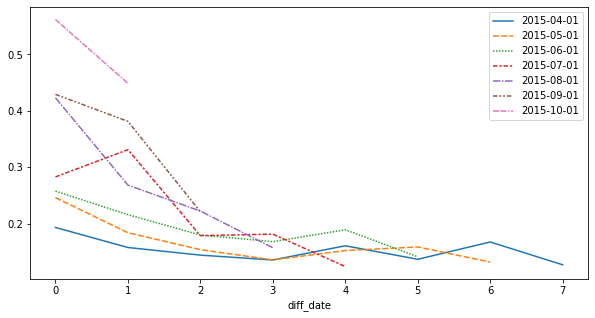

In [144]:
plt.figure(figsize=(10,5))
sns.lineplot(data=final[['2015-04-01','2015-05-01',\
                         '2015-06-01','2015-07-01',\
                         '2015-08-01','2015-09-01','2015-10-01']])
plt.legend(['2015-04-01','2015-05-01',\
                         '2015-06-01','2015-07-01',\
                         '2015-08-01','2015-09-01','2015-10-01'])

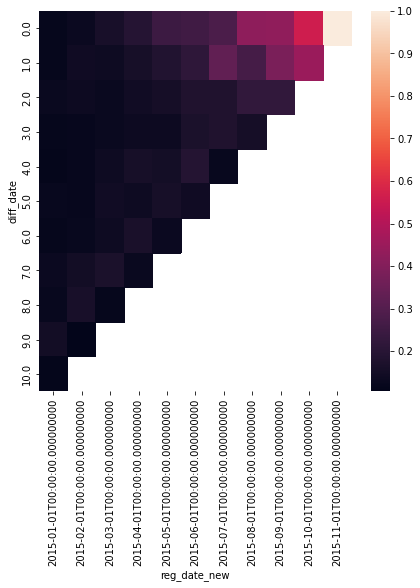

In [134]:
plt.figure(figsize=(7,7))
sns.heatmap(final)

На графиках выше видно, что в июле 2015 произошли изменения. После Июля Retention для новых пользователей увеличился. Таким образом можно сделать вывод, что данная акция позволила увеличить Retention для новых пользователей.